# First attempt with Jupyter, Data Analisys with Python, Panda and Plotting

This is a test for Jupyter notebooks y python scripts

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
pd.set_option('display.max_rows',10)

In [2]:
print (os.getcwd())

/Users/fraperez/Documents/Python


In [3]:
mlb = pd.read_csv('data/mlbsalaries.csv')

In [4]:
 grouped = mlb.groupby('Year')

In [5]:
 type(grouped)

pandas.core.groupby.DataFrameGroupBy

In [6]:
t = (group.sort_index(by='Salary', ascending=False)[:1] for yr,group in grouped)

In [7]:
topsalaries = pd.DataFrame()
for line in t:
    topsalaries = topsalaries.append(line)
ts = topsalaries[['Year','Salary']]
ts = ts.set_index('Year')

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  if __name__ == '__main__':


pandas.core.frame.DataFrame

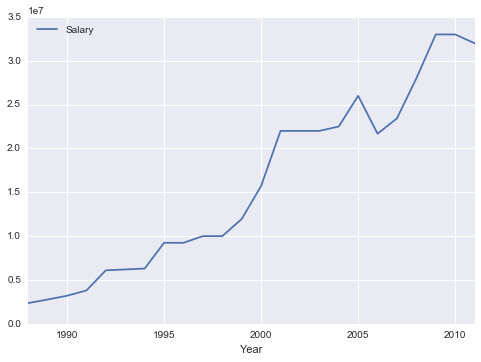

In [8]:
ts.plot()
type(ts)

In [9]:
titanic = pd.read_csv('data/titanic.csv')

In [10]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
titanic.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [12]:
mask = ((titanic.Survived == 1) & (titanic.Age < 20))

In [13]:
yough = titanic[mask]

In [14]:
yough.sort_values(by=['Pclass','Age'] , ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
44,45,1,3,"Devaney, Miss. Margaret Delia",female,19.00,0,0,330958,7.8792,NaN,Q
192,193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.00,1,0,350046,7.8542,NaN,S
283,284,1,3,"Dorking, Mr. Edward Arthur",male,19.00,0,0,A/5. 10482,8.0500,NaN,S
204,205,1,3,"Cohen, Mr. Gurshon ""Gus""",male,18.00,0,0,A/5 3540,8.0500,NaN,S
677,678,1,3,"Turja, Miss. Anna Sofia",female,18.00,0,0,4138,9.8417,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
689,690,1,1,"Madill, Miss. Georgette Alexandra",female,15.00,0,1,24160,211.3375,B5,S
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.00,1,2,113760,120.0000,B96 B98,S
802,803,1,1,"Carter, Master. William Thornton II",male,11.00,1,2,113760,120.0000,B96 B98,S
445,446,1,1,"Dodge, Master. Washington",male,4.00,0,2,33638,81.8583,A34,S


In [15]:
yough_hist = yough.sort_values(by=['Pclass','Age'] , ascending=False)

# We are plotting the output below
The idea here is to plot by Class and Age

In [16]:
grouped = yough.groupby(by = ('Age'))

In [17]:
grouped.count()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Age,,,,,,,,,,,
0.42,1,1,1,1,1,1,1,1,1,0,1
0.67,1,1,1,1,1,1,1,1,1,0,1
0.75,2,2,2,2,2,2,2,2,2,0,2
0.83,2,2,2,2,2,2,2,2,2,0,2
0.92,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
15.00,4,4,4,4,4,4,4,4,4,1,4
16.00,6,6,6,6,6,6,6,6,6,3,6
17.00,6,6,6,6,6,6,6,6,6,3,6


**With the example below: I haven't figure out yet, how to plot this data. Below is just an example of how to put once plot on top of another.**

**The problem here is that if, there is overlaping data, it could potentially cover on to another. **

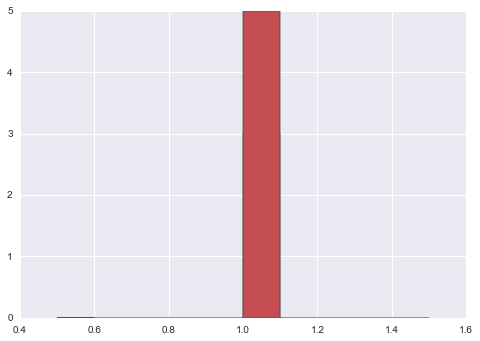

In [18]:
grouped.get_group(3).Survived.hist()
grouped.get_group(2).Survived.hist()
grouped.get_group(1).Survived.hist()

In [21]:
# Create ranges or bins

bins = [0,5,10,15,20]



In [22]:
grpmatrix = grouped.as_matrix()

AttributeError: Cannot access callable attribute 'as_matrix' of 'DataFrameGroupBy' objects, try using the 'apply' method

In [ ]:

groups = grouped.cut(grpmatrix.Age, bins)